# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [8]:
# The data is collected from 17 marketing campaigns over 2.5 years period, contacting more than 79,000 customers.
# It resulted in 8% success rate, implying that the dataset is imbalanced.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [231]:
import pandas as pd

In [232]:
df = pd.read_csv('/Users/dsgarcha/Downloads/module_17_starter/data/bank-additional-full.csv', sep = ';')

In [233]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [234]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [235]:
df['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [236]:
df['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [237]:
df['housing'].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [238]:
df['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [239]:
df['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [240]:
df['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [242]:
#drop rows where column, job = 'unknown'
df = df[df.job != 'unknown']
df['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: job, dtype: int64

In [243]:
#drop rows where column, marital = 'unknown'
df = df[df.marital != 'unknown']
df['marital'].value_counts()

married     24694
single      11494
divorced     4599
Name: marital, dtype: int64

In [244]:
#drop rows where column, housing = 'unknown'
df = df[df.housing != 'unknown']
df['housing'].value_counts()

yes    21376
no     18427
Name: housing, dtype: int64

In [245]:
#drop rows where column, loan = 'unknown'
df = df[df.loan != 'unknown']
df['loan'].value_counts()

no     33620
yes     6183
Name: loan, dtype: int64

In [246]:
#drop rows where column, education = 'unknown'
df = df[df.education != 'unknown']
df['education'].value_counts()

university.degree      11821
high.school             9244
basic.9y                5856
professional.course     5100
basic.4y                4002
basic.6y                2204
illiterate                18
Name: education, dtype: int64

In [247]:
#replace with 'no' where column, default = 'unknown'
df['default'].replace({'unknown': 'no'}, inplace=True)
df['default'].value_counts()

no     38242
yes        3
Name: default, dtype: int64

In [248]:
# Change target to numeric data
df['y'].replace({'yes': 1, 'no': 0}, inplace=True)
df['y'].value_counts()

0    33987
1     4258
Name: y, dtype: int64

In [249]:
# Change housing, loan, default to numeric data
df['housing'].replace({'yes': 1, 'no': 0}, inplace=True)
df['loan'].replace({'yes': 1, 'no': 0}, inplace=True)
df['default'].replace({'yes': 1, 'no': 0}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38245 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             38245 non-null  int64  
 1   job             38245 non-null  object 
 2   marital         38245 non-null  object 
 3   education       38245 non-null  object 
 4   default         38245 non-null  int64  
 5   housing         38245 non-null  int64  
 6   loan            38245 non-null  int64  
 7   contact         38245 non-null  object 
 8   month           38245 non-null  object 
 9   day_of_week     38245 non-null  object 
 10  duration        38245 non-null  int64  
 11  campaign        38245 non-null  int64  
 12  pdays           38245 non-null  int64  
 13  previous        38245 non-null  int64  
 14  poutcome        38245 non-null  object 
 15  emp.var.rate    38245 non-null  float64
 16  cons.price.idx  38245 non-null  float64
 17  cons.conf.idx   38245 non-null 

In [250]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

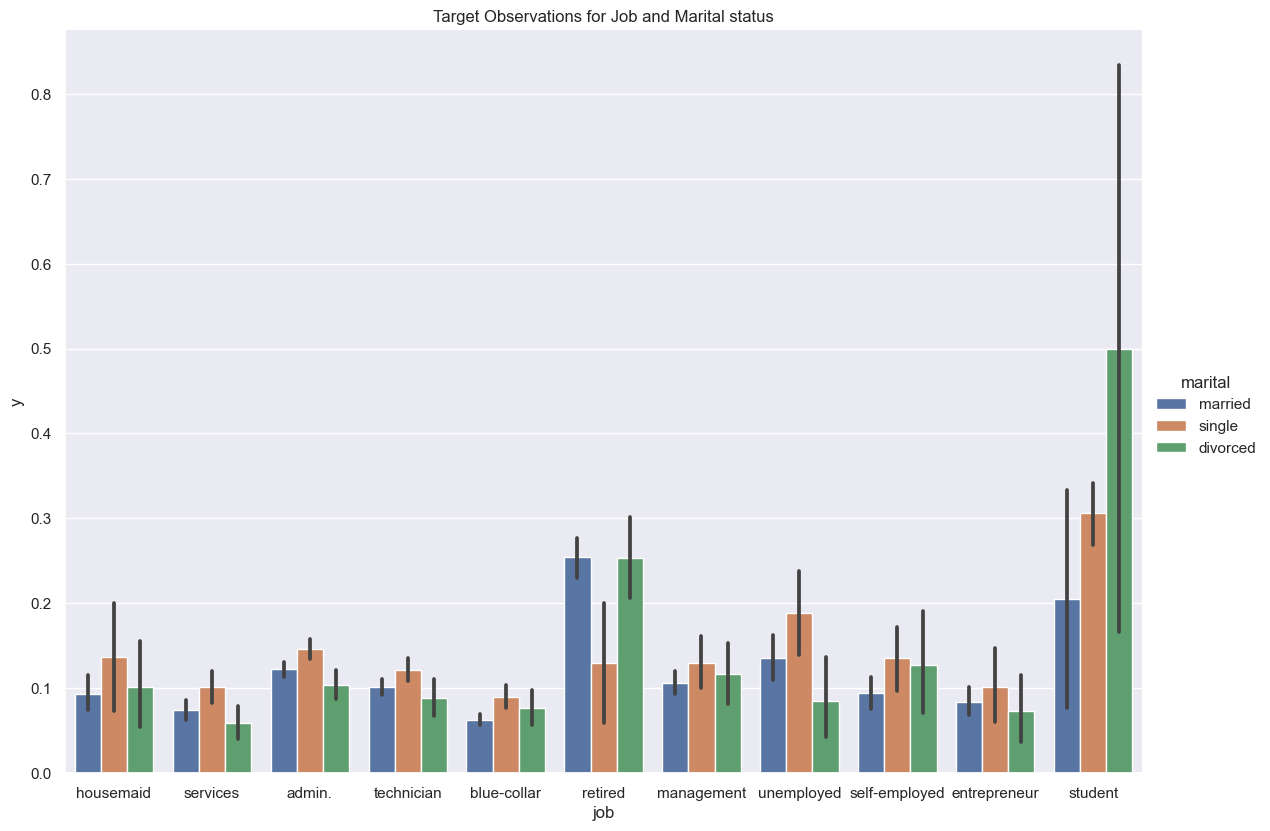

In [251]:
sns.catplot(data=df, x="job", y="y", hue="marital", kind="bar", height=8.27, aspect=11.7/8.27)
plt.title('Target Observations for Job and Marital status');
plt.show()

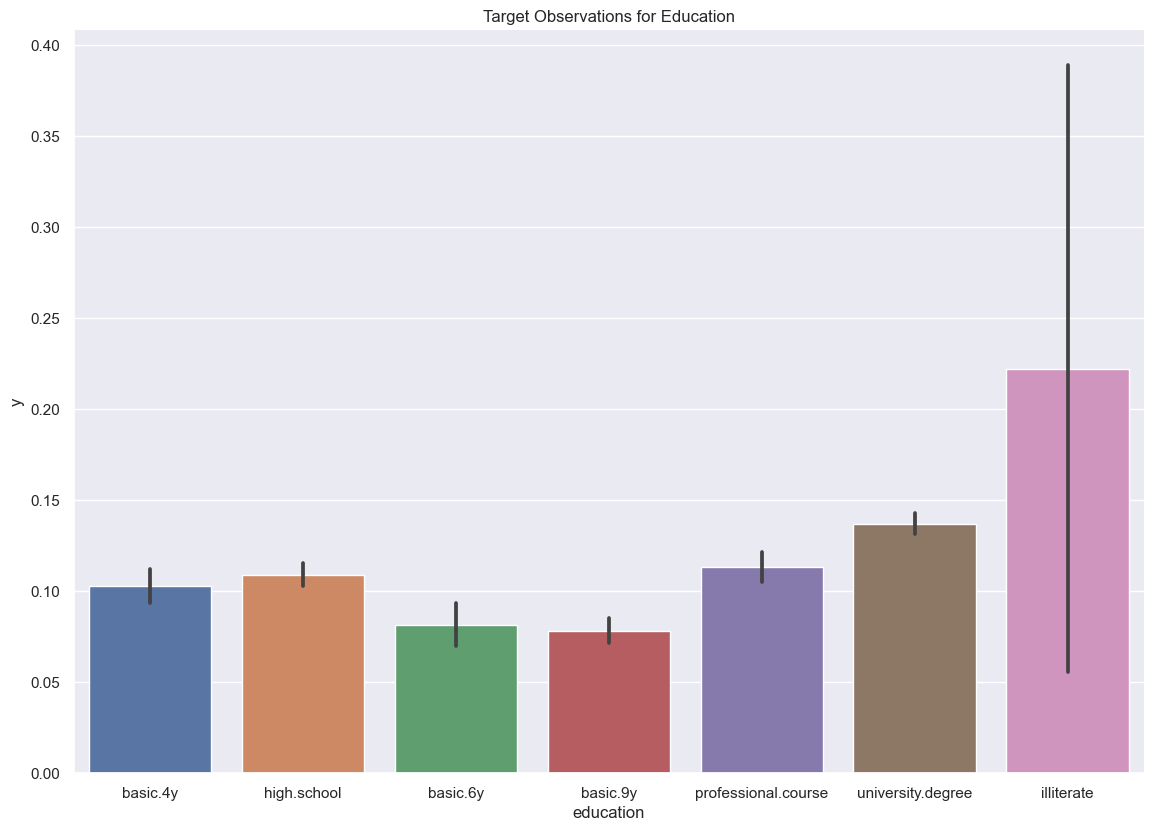

In [252]:
sns.catplot(data=df, x="education", y="y", kind="bar", height=8.27, aspect=11.7/8.27)
plt.title('Target Observations for Education');
plt.show()

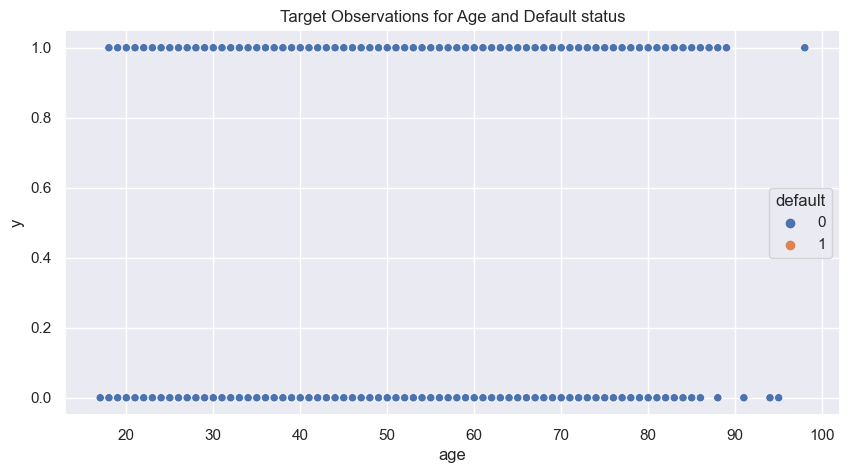

In [253]:
sns.scatterplot(data = df, x = 'age', y = 'y', hue = 'default')
plt.title('Target Observations for Age and Default status');
plt.show()

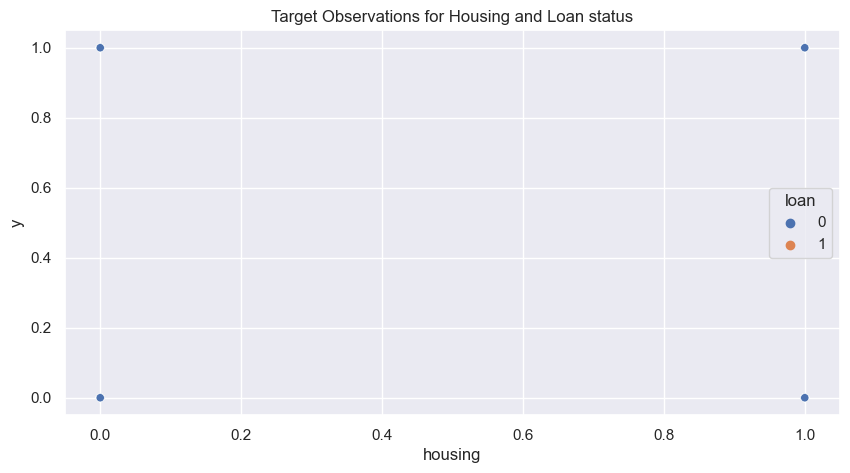

In [254]:
sns.scatterplot(data = df, x = 'housing', y = 'y', hue = 'loan')
plt.title('Target Observations for Housing and Loan status');
plt.show()

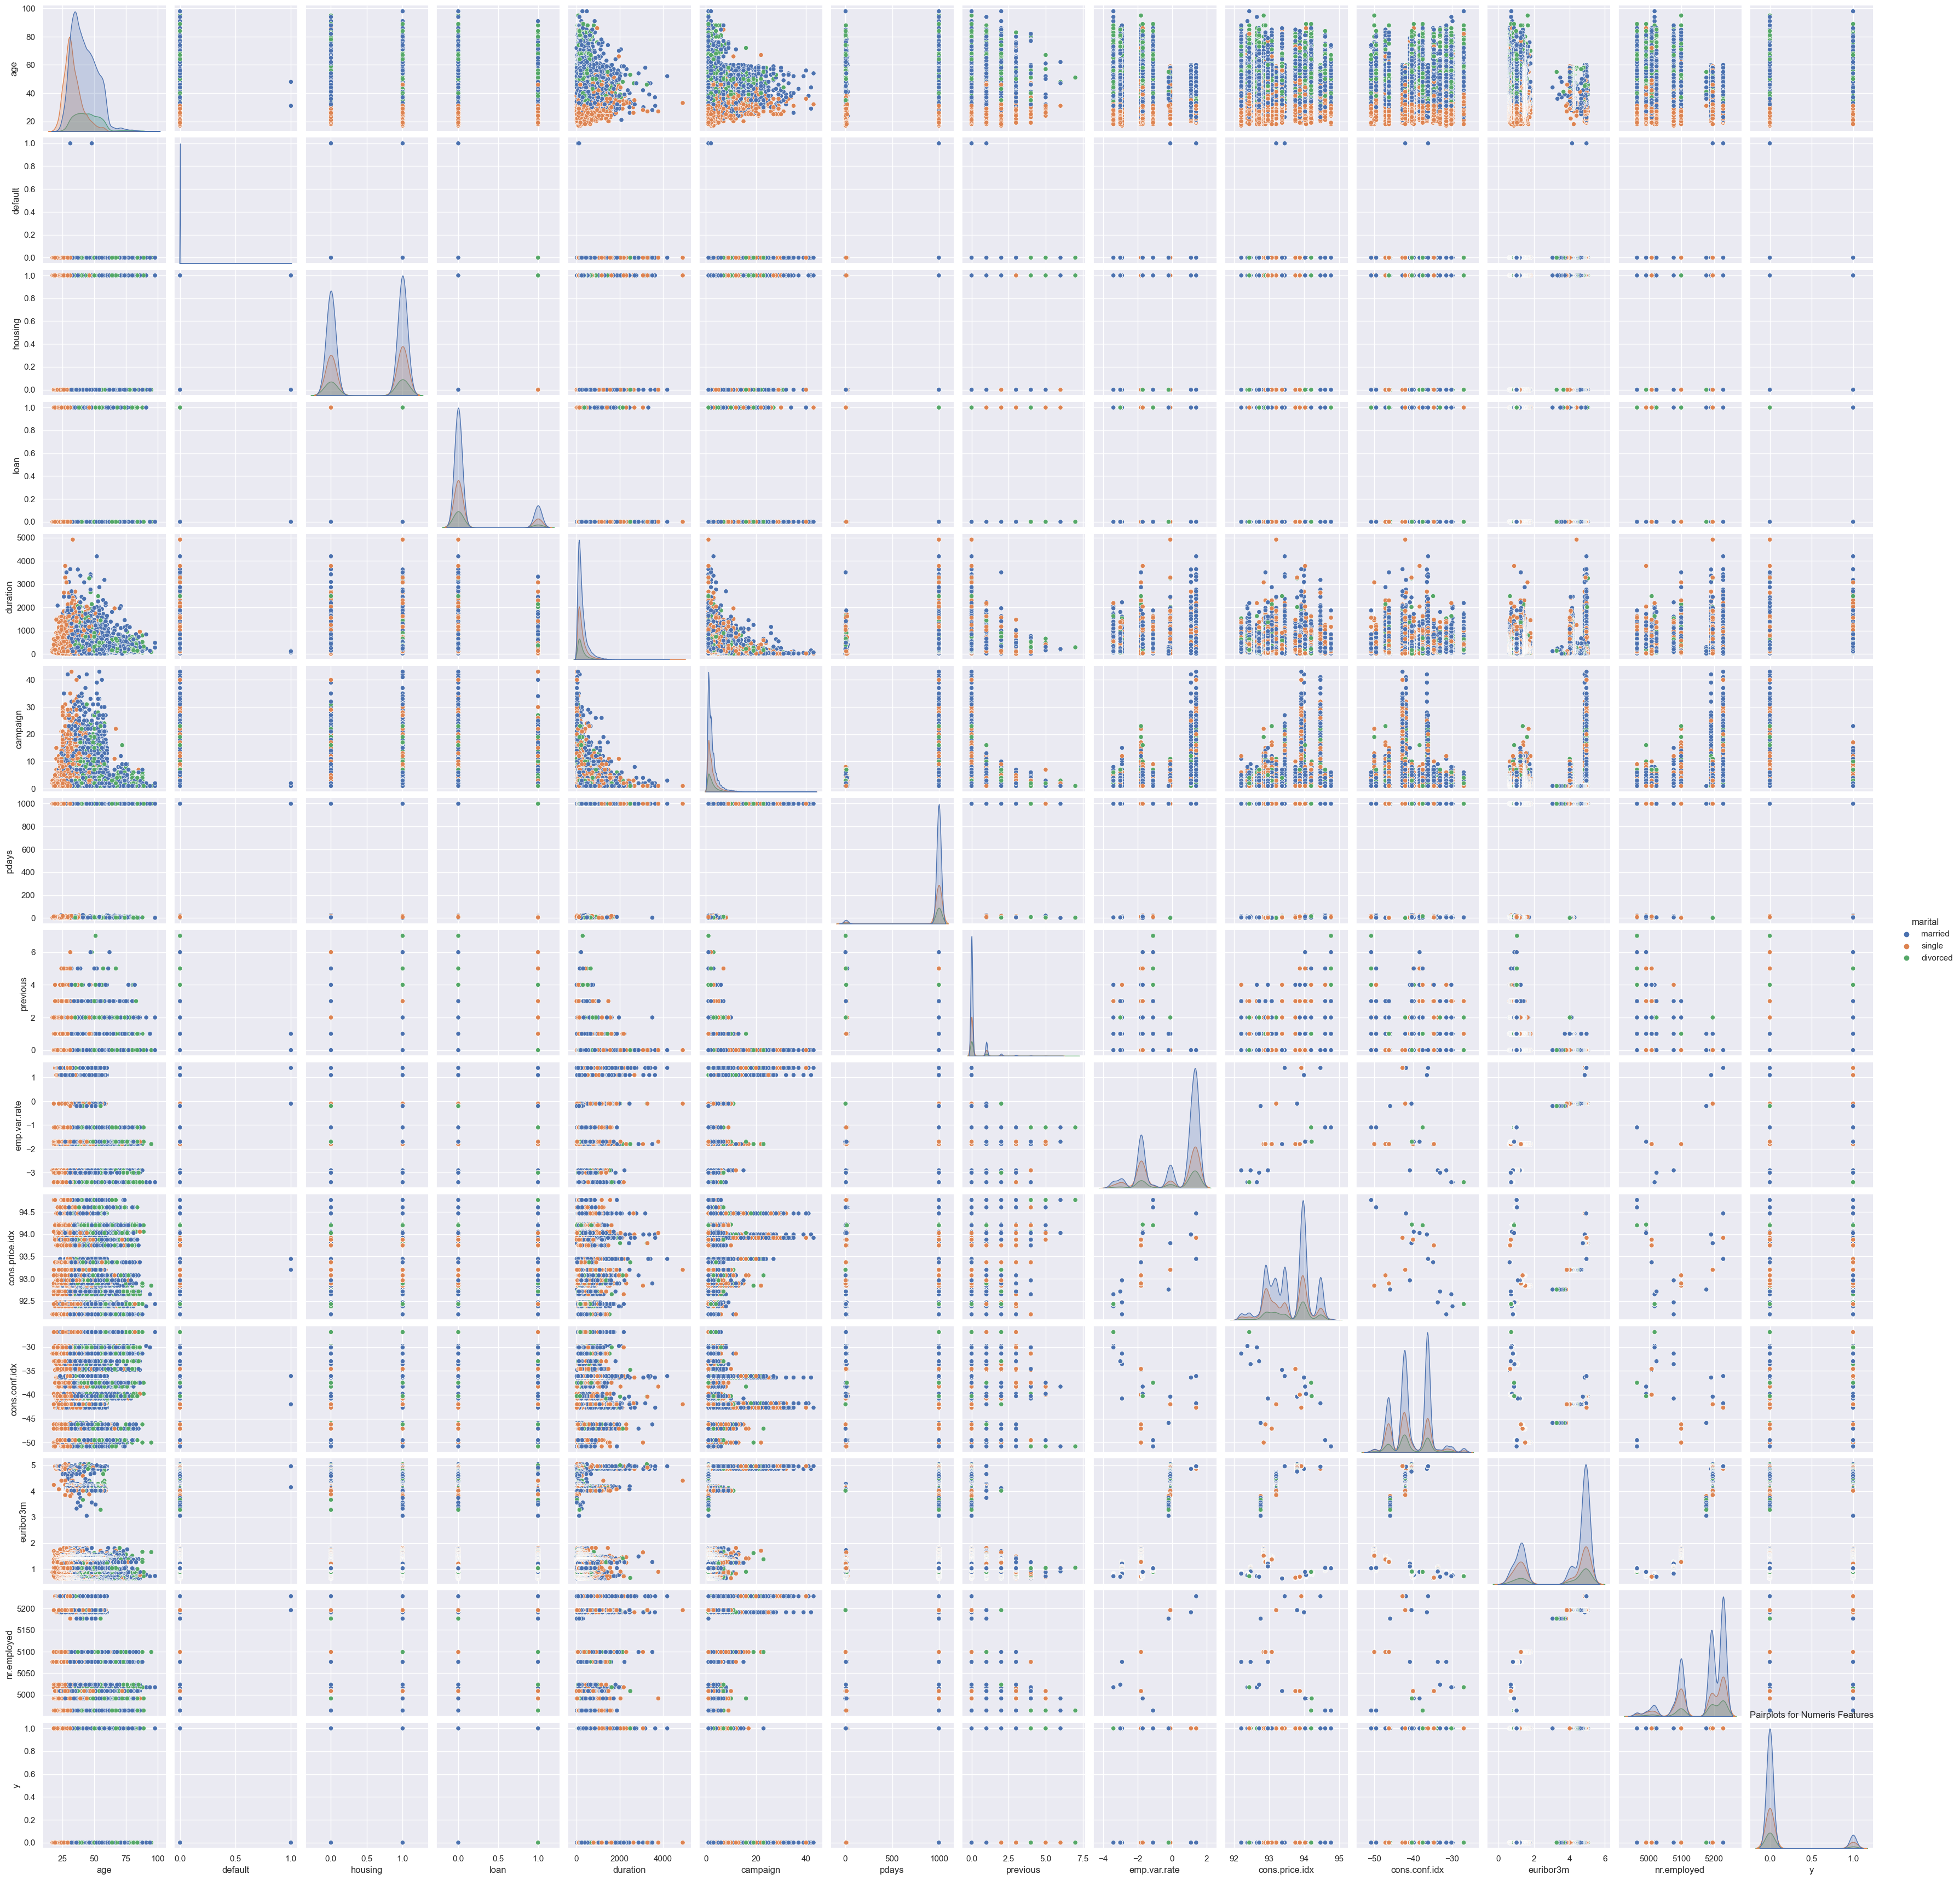

In [201]:
# Commenting out the code as it takes too long
#sns.pairplot(df, hue = 'marital');
#plt.title('Pairplots for Numeris Features');
#plt.show()

In [290]:
df.corr()

/var/folders/c0/7z5mn_qd0vq3t5n21bgqmyy00000gn/T/ipykernel_3169/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,0.002128,0.000291,-0.006390,0.002405,0.005519,-0.038476,0.028479,-0.003563,-0.001236,0.127644,0.007695,-0.021054,0.030130
default,0.002128,1.000000,-0.003637,-0.003805,-0.005280,-0.003947,0.001705,0.002969,0.004622,-0.003191,0.004741,0.005476,0.006159,-0.003135
housing,0.000291,-0.003637,1.000000,0.045077,-0.009104,-0.010817,-0.009370,0.020837,-0.060675,-0.080849,-0.034437,-0.059595,-0.046513,0.009996
loan,-0.006390,-0.003805,0.045077,1.000000,0.000280,0.003914,0.001874,-0.003268,0.002336,-0.003146,-0.012992,0.000317,0.004088,-0.005603
duration,0.002405,-0.005280,-0.009104,0.000280,1.000000,-0.071110,-0.044278,0.016304,-0.025003,0.007530,-0.008656,-0.029029,-0.040722,0.405832
campaign,0.005519,-0.003947,-0.010817,0.003914,-0.071110,1.000000,0.051536,-0.078478,0.150752,0.128665,-0.010713,0.134783,0.143150,-0.065117
pdays,-0.038476,0.001705,-0.009370,0.001874,-0.044278,0.051536,1.000000,-0.581303,0.268705,0.080828,-0.090587,0.291953,0.366783,-0.319351
previous,0.028479,0.002969,0.020837,-0.003268,0.016304,-0.078478,-0.581303,1.000000,-0.419647,-0.208783,-0.056856,-0.450672,-0.494617,0.221159
emp.var.rate,-0.003563,0.004622,-0.060675,0.002336,-0.025003,0.150752,0.268705,-0.419647,1.000000,0.775418,0.211865,0.972422,0.907920,-0.292265
cons.price.idx,-0.001236,-0.003191,-0.080849,-0.003146,0.007530,0.128665,0.080828,-0.208783,0.775418,1.000000,0.070521,0.689600,0.524272,-0.133084


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [255]:
X = df[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']]
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size=.35)

X_num = df[['age', 'default', 'housing', 'loan']]
X_num_train, X_num_test, y_num_train, y_num_test = train_test_split(X_num, y, random_state = 42, test_size=.35)

In [256]:
# Creating a column transformer

#transformer = make_column_transformer((OneHotEncoder(), ['job', 'marital','education']),
#                                     remainder = StandardScaler())

selector = make_column_selector(dtype_include=object) # will select all columns with object datatype

# Use your selector object in the make_column_transformer
transformer = make_column_transformer((OneHotEncoder(), selector),
                                    remainder = StandardScaler())

In [257]:
selector

In [258]:
transformer

ColumnTransformer(remainder=StandardScaler(),
                  transformers=[('onehotencoder', OneHotEncoder(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fcd21777700>)])

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [259]:
# Set baseline to the most frequently occurring class
baseline = df['y'].value_counts(normalize = True)[0] # 0.8887 -> 88.87% rows have value ‘No’ or 0
baseline

0.8886651849915022

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [260]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_text

from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC
from sklearn import datasets, metrics, svm
from sklearn.feature_selection import SelectFromModel
import time

In [261]:
# Using Pipeline for Logistic Regression

# Feature Extractor
extractor = SelectFromModel(LogisticRegression(penalty='l1', solver = 'liblinear' ,random_state = 42))
lgr_pipe = Pipeline([('transformer', transformer), ('selector', extractor),
                   ('lgr', LogisticRegression(random_state=42, max_iter = 1000))])
start_time = time.time()
lgr_pipe.fit(X_train, y_train) #fit-time: 2 sec
print(time.time()-start_time)

lgr_test_score = lgr_pipe.score(X_test, y_test) # value is 0.8879
print(lgr_test_score)



1.7153887748718262
0.8878679217092484


In [262]:
preds = lgr_pipe.predict(X_test)
accuracy = accuracy_score(y_test, preds) 
precision = precision_score(y_test, preds) 
recall = recall_score(y_test, preds) 

print(f'Accuracy: {accuracy: .4f}')
print(f'Precision: {precision: .4f}')
print(f'Recall: {recall: .4f}')


Accuracy:  0.8879
Precision:  0.0000
Recall:  0.0000


/Users/dsgarcha/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [263]:
# Using GridSearchCV for Logistic Regression

lgr_params = {'penalty': ['l1', 'l2'], 'C': [0.1, 1, 10, 100]}

lgr_grid = GridSearchCV(LogisticRegression(), param_grid=lgr_params)
start_time = time.time()
lgr_grid.fit(X_num_train, y_num_train) #fit-time: 1.5 sec
print(time.time()-start_time)

lgr_test_score = lgr_grid.score(X_num_test, y_num_test) # value is 0.8879
print(lgr_test_score)

1.0771558284759521
0.8878679217092484


/Users/dsgarcha/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/dsgarcha/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dsgarcha/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/dsgarcha/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 

In [264]:
preds = lgr_grid.predict(X_num_test)
accuracy = accuracy_score(y_num_test, preds) 
precision = precision_score(y_num_test, preds) 
recall = recall_score(y_num_test, preds) 

print(f'Accuracy: {accuracy: .4f}')
print(f'Precision: {precision: .4f}')
print(f'Recall: {recall: .4f}')

Accuracy:  0.8879
Precision:  0.0000
Recall:  0.0000


/Users/dsgarcha/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Problem 9: Score the Model

What is the accuracy of your model?

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [265]:
# Pipeline with KNN
knn_params = {'knn__n_neighbors': list(range(1, 100, 5))}

knn_pipe = Pipeline([('transform', transformer), ('knn', KNeighborsClassifier())])
knn_pipe.fit(X_train, y_train)

knn_grid = GridSearchCV(knn_pipe, param_grid=knn_params)
start_time = time.time()
knn_grid.fit(X_train, y_train) #fit-time: 180 sec
print(time.time()-start_time)
knn_test_score = knn_grid.score(X_test, y_test) # value is 0.8877
print(knn_test_score)

179.19813990592957
0.8877932167936651


In [266]:
preds = knn_grid.predict(X_test)
accuracy = accuracy_score(y_test, preds) 
precision = precision_score(y_test, preds) 
recall = recall_score(y_test, preds) 

print(f'Accuracy: {accuracy: .4f}')
print(f'Precision: {precision: .4f}')
print(f'Recall: {recall: .4f}')

Accuracy:  0.8777
Precision:  0.2500
Recall:  0.0453


In [267]:
# Model with Decision Tree
dt_pipe = Pipeline([('transformer', transformer), ('selector', extractor),
                          ("dtreeCLF", DecisionTreeClassifier())])
    
start_time = time.time()
dt_pipe.fit(X_train, y_train)  #fit-time: 2 sec

print(time.time()-start_time)
tree_acc = dt_pipe.score(X_test, y_test)
print(tree_acc) # value is 0.8709

1.9466171264648438
0.8709846107873898


In [268]:
preds = dt_pipe.predict(X_test)
accuracy = accuracy_score(y_test, preds) 
precision = precision_score(y_test, preds) 
recall = recall_score(y_test, preds) 

print(f'Accuracy: {accuracy: .4f}')
print(f'Precision: {precision: .4f}')
print(f'Recall: {recall: .4f}')

Accuracy:  0.8710
Precision:  0.2565
Recall:  0.0793


In [269]:
# Model with SVC
svc_params = {'kernel': ['rbf', 'linear', 'sigmoid'],
         'gamma': [0.1, 5.0, 50.0],}

#svc_pipe = Pipeline([('transformer', transformer), ('selector', extractor),
#                          ("svc_clf", SVC())])

svc_grid = GridSearchCV(SVC(), param_grid=svc_params)
start_time = time.time()
svc_grid.fit(X_num_train, y_num_train) #fit-time: 5 minutes
print(time.time()-start_time)

svc_test_score = svc_grid.score(X_num_test, y_num_test) # value is 0.8879
print(svc_test_score)

297.36567902565
0.8878679217092484


In [270]:
preds = svc_grid.predict(X_num_test)
accuracy = accuracy_score(y_num_test, preds) 
precision = precision_score(y_num_test, preds) 
recall = recall_score(y_num_test, preds) 

print(f'Accuracy: {accuracy: .4f}')
print(f'Precision: {precision: .4f}')
print(f'Recall: {recall: .4f}')

Accuracy:  0.8879
Precision:  0.0000
Recall:  0.0000


/Users/dsgarcha/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [271]:
res_dict = {'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 'SVC'],
            'Train Time': [1.5, 180, 2, 300],
            'Accuracy': [0.8879, 0.8877, 0.8710, 0.8879],
            'Precision': [0, 0.2500, 0.2565, 0],
            'Recall': [0, 0.0453, 0.0793, 0]}

results_df = pd.DataFrame(res_dict).set_index('Model')
results_df

,Train Time,Accuracy,Precision,Recall
Model,,,,
Logistic Regression,1.5,0.8879,0.0000,0.0000
KNN,180.0,0.8877,0.2500,0.0453
Decision Tree,2.0,0.8710,0.2565,0.0793
SVC,300.0,0.8879,0.0000,0.0000


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38245 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             38245 non-null  int64  
 1   job             38245 non-null  object 
 2   marital         38245 non-null  object 
 3   education       38245 non-null  object 
 4   default         38245 non-null  int64  
 5   housing         38245 non-null  int64  
 6   loan            38245 non-null  int64  
 7   contact         38245 non-null  object 
 8   month           38245 non-null  object 
 9   day_of_week     38245 non-null  object 
 10  duration        38245 non-null  int64  
 11  campaign        38245 non-null  int64  
 12  pdays           38245 non-null  int64  
 13  previous        38245 non-null  int64  
 14  poutcome        38245 non-null  object 
 15  emp.var.rate    38245 non-null  float64
 16  cons.price.idx  38245 non-null  float64
 17  cons.conf.idx   38245 non-null 

In [273]:
X_all = df.drop(['duration','y'], axis=1)
y = df['y']
X_all_train, X_all_test, y_train, y_test = train_test_split(X_all, y, random_state = 42, test_size=.35)


In [285]:
# Pipeline with KNN
knn_params = {'knn__n_neighbors': list(range(1, 100, 2))}

knn_pipe = Pipeline([('transform', transformer), ('knn', KNeighborsClassifier())])
knn_pipe.fit(X_all_train, y_train)

knn_grid = GridSearchCV(knn_pipe, param_grid=knn_params)
start_time = time.time()
knn_grid.fit(X_all_train, y_train) #fit-time: 150 sec
print(time.time()-start_time)
knn_test_score = knn_grid.score(X_all_test, y_test) # value is 0.8999
print(knn_test_score)

146.36759328842163
0.8998954131181832


In [286]:
preds = knn_grid.predict(X_all_test)
accuracy = accuracy_score(y_test, preds) 
precision = precision_score(y_test, preds) 
recall = recall_score(y_test, preds) 

print(f'Accuracy: {accuracy: .4f}')
print(f'Precision: {precision: .4f}')
print(f'Recall: {recall: .4f}')

Accuracy:  0.8999
Precision:  0.6709
Recall:  0.2105


In [276]:
# Model with Decision Tree
dt_pipe = Pipeline([('transformer', transformer), ('selector', extractor),
                          ("dtreeCLF", DecisionTreeClassifier(max_depth=100, criterion='entropy'))])
    
start_time = time.time()
dt_pipe.fit(X_all_train, y_train)  #fit-time: 5 sec

print(time.time()-start_time)
tree_acc = dt_pipe.score(X_all_test, y_test)
print(tree_acc) # value is 0.8709

4.98880410194397
0.8396832511579262


In [277]:
preds = dt_pipe.predict(X_all_test)
accuracy = accuracy_score(y_test, preds) 
precision = precision_score(y_test, preds) 
recall = recall_score(y_test, preds) 

print(f'Accuracy: {accuracy: .4f}')
print(f'Precision: {precision: .4f}')
print(f'Recall: {recall: .4f}')

Accuracy:  0.8397
Precision:  0.3049
Recall:  0.3358


In [287]:
res_dict = {'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 'SVC', 'KNN Revised', 'DT Revised'],
            'Train Time': [1.5, 180, 2, 300, 150, 5],
            'Accuracy': [0.8879, 0.8877, 0.8710, 0.8879, 0.8999, 0.8397],
            'Precision': [0, 0.2500, 0.2565, 0, 0.6709, 0.3049],
            'Recall': [0, 0.0453, 0.0793, 0, 0.2105, 0.3358]}

results_df = pd.DataFrame(res_dict).set_index('Model')
results_df

,Train Time,Accuracy,Precision,Recall
Model,,,,
Logistic Regression,1.5,0.8879,0.0000,0.0000
KNN,180.0,0.8877,0.2500,0.0453
Decision Tree,2.0,0.8710,0.2565,0.0793
SVC,300.0,0.8879,0.0000,0.0000
KNN Revised,150.0,0.8999,0.6709,0.2105
DT Revised,5.0,0.8397,0.3049,0.3358


In [288]:
#Print The value of best Hyperparameters
print('Best n_neighbors:', knn_grid.best_estimator_.get_params()['knn__n_neighbors'])

Best n_neighbors: 73


##### Questions